In [1]:
import os
from google.colab import drive
drive.mount('/content/gdrive')
drive.mount('/content/drive')

Mounted at /content/gdrive
Mounted at /content/drive


# pythonProjectFlask is Anisha's personal  folder with latest changes as she is making changes here.

In [2]:
%cd '/content/drive/Shareddrives/Data 298A/'
!zip -r '/content/pythonProjectFlask.zip' pythonProjectFlask


/content/drive/Shareddrives/Data 298A
  adding: pythonProjectFlask/ (stored 0%)
  adding: pythonProjectFlask/static/ (stored 0%)
  adding: pythonProjectFlask/static/images/ (stored 0%)
  adding: pythonProjectFlask/static/images/airbnb_logo.jpeg (deflated 10%)
  adding: pythonProjectFlask/static/images/about1.jpeg (deflated 0%)
  adding: pythonProjectFlask/static/images/about2.jpeg (deflated 1%)
  adding: pythonProjectFlask/static/images/hero-background.jpeg (deflated 2%)
  adding: pythonProjectFlask/static/images/about.jpeg (deflated 0%)
  adding: pythonProjectFlask/static/images/chat_icon.png (deflated 4%)
  adding: pythonProjectFlask/static/about_style.css (deflated 57%)
  adding: pythonProjectFlask/static/style.css (deflated 57%)
  adding: pythonProjectFlask/static/.DS_Store (deflated 93%)
  adding: pythonProjectFlask/static/chatbot_style.css (deflated 72%)
  adding: pythonProjectFlask/static/app.js (deflated 67%)
  adding: pythonProjectFlask/jsons/ (stored 0%)
  adding: pythonProje

In [3]:
%cd '/content/'
!unzip pythonProjectFlask.zip

/content
Archive:  pythonProjectFlask.zip
   creating: pythonProjectFlask/
   creating: pythonProjectFlask/static/
   creating: pythonProjectFlask/static/images/
  inflating: pythonProjectFlask/static/images/airbnb_logo.jpeg  
  inflating: pythonProjectFlask/static/images/about1.jpeg  
  inflating: pythonProjectFlask/static/images/about2.jpeg  
  inflating: pythonProjectFlask/static/images/hero-background.jpeg  
  inflating: pythonProjectFlask/static/images/about.jpeg  
  inflating: pythonProjectFlask/static/images/chat_icon.png  
  inflating: pythonProjectFlask/static/about_style.css  
  inflating: pythonProjectFlask/static/style.css  
  inflating: pythonProjectFlask/static/.DS_Store  
  inflating: pythonProjectFlask/static/chatbot_style.css  
  inflating: pythonProjectFlask/static/app.js  
   creating: pythonProjectFlask/jsons/
  inflating: pythonProjectFlask/jsons/validation_labels.json  
  inflating: pythonProjectFlask/jsons/train_labels.json  
   creating: pythonProjectFlask/templ

In [4]:
%cd '/content/pythonProjectFlask'
!python -m pip install pyyaml==5.1
!pip install transformers
!pip install pyngrok
!pip install flask-ngrok
!pip install pymysql
!ngrok authtoken '2WRXZOJUBB3IOX0RrUjGVR6wJsg_5YWsmq34UaANWPymTFHJn'
import sys, os, distutils.core
# Note: This is a faster way to install detectron2 in Colab, but it does not include all functionalities.
# See https://detectron2.readthedocs.io/tutorials/install.html for full installation instructions
!git clone 'https://github.com/facebookresearch/detectron2'
dist = distutils.core.run_setup("./detectron2/setup.py")
!python -m pip install {' '.join([f"'{x}'" for x in dist.install_requires])}
sys.path.insert(0, os.path.abspath('./detectron2'))


/content/pythonProjectFlask
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.2/274.2 kB 6.7 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.1/311.1 kB 34.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 47.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 45.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 18.6 MB/s eta 0:00:00
  

In [5]:
def compare_inventory_data(inventory_data_old, inventory_data_new):
    # Create dictionaries to store counts for each category and amenity
    old_counts = {(item['category'], item['amenity_name']): item['amenity_count'] for item in inventory_data_old}
    new_counts = {(item['category'], item['amenity_name']): item['amenity_count'] for item in inventory_data_new}

    # Initialize variables to store results
    result_dict = {'changed_items': [], 'missing_items': [], 'unchanged_items': []}
    for key in set(old_counts.keys()) | set(new_counts.keys()):
        old_count = old_counts.get(key, 0)
        new_count = new_counts.get(key, 0)

        if key not in old_counts:
            # Key is in new_counts but not in old_counts
            result_dict['changed_items'].append({
                'category': key[0],
                'amenity_name': key[1],
                'old_count': 0,
                'new_count': new_count,
            })
        elif key not in new_counts:
            # Key is in old_counts but not in new_counts
            result_dict['missing_items'].append({
                'category': key[0],
                'amenity_name': key[1],
                'old_count': old_count,
                'new_count': 0,
            })
        elif old_count != new_count:
            # Count has changed
            result_dict['changed_items'].append({
                'category': key[0],
                'amenity_name': key[1],
                'old_count': old_count,
                'new_count': new_count,
            })
        elif key in old_counts and key in new_counts:
              # Count is unchanged
              result_dict['unchanged_items'].append({
                  'category': key[0],
                  'amenity_name': key[1],
                  'count': old_count,
              })


    return result_dict





In [6]:
import torch, detectron2
!nvcc --version
import pymysql
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
print("detectron2:", detectron2.__version__)

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0
torch:  2.1 ; cuda:  cu118
detectron2: 0.6


In [7]:
!pip install langchain
!pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.2/220.2 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llmx 0.0.15a0 requires cohere, which is not installed.
llmx 0.0.15a0 requires tiktoken, which is not installed.


# Flask

Registering airbnb-openImagesV7/train
Registering airbnb-openImagesV7/validation


model_final_f10217.pkl: 178MB [00:01, 154MB/s]                           


[11/14 02:39:23 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


 * Running on http://a9dd-34-83-12-90.ngrok-free.app
 * Traffic stats available on http://127.0.0.1:4040


INFO:werkzeug:127.0.0.1 - - [14/Nov/2023 02:43:37] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [14/Nov/2023 02:43:37] "GET /static/chatbot_style.css HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [14/Nov/2023 02:43:37] "GET /static/style.css HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [14/Nov/2023 02:43:37] "GET /static/app.js HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [14/Nov/2023 02:43:38] "GET /static/images/airbnb_logo.jpeg HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [14/Nov/2023 02:43:38] "GET /static/images/hero-background.jpeg HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [14/Nov/2023 02:43:38] "GET /static/images/chat_icon.png HTTP/1.1" 200 -


[
  {
    "airbnb_id": 1,
    "amenity_name": "Bed",
    "amenity_count": 1,
    "CATEGORY": "Kitchen"
  },
  {
    "airbnb_id": 1,
    "amenity_name": "bench",
    "amenity_count": 2,
    "CATEGORY": "Living Room"
  },
  {
    "airbnb_id": 1,
    "amenity_name": "book",
    "amenity_count": 2,
    "CATEGORY": "Living Room"
  },
  {
    "airbnb_id": 1,
    "amenity_name": "bottle",
    "amenity_count": 5,
    "CATEGORY": "Kitchen"
  },
  {
    "airbnb_id": 1,
    "amenity_name": "chair",
    "amenity_count": 2,
    "CATEGORY": "Kitchen"
  },
  {
    "airbnb_id": 1,
    "amenity_name": "Couch",
    "amenity_count": 2,
    "CATEGORY": "Living Room"
  },
  {
    "airbnb_id": 1,
    "amenity_name": "cup",
    "amenity_count": 7,
    "CATEGORY": "Kitchen"
  },
  {
    "airbnb_id": 1,
    "amenity_name": "dining table",
    "amenity_count": 1,
    "CATEGORY": "Kitchen"
  },
  {
    "airbnb_id": 1,
    "amenity_name": "microwave",
    "amenity_count": 1,
    "CATEGORY": "Kitchen"
  },
  {
   

INFO:werkzeug:127.0.0.1 - - [14/Nov/2023 02:44:02] "POST /airbot HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [14/Nov/2023 02:44:23] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [14/Nov/2023 02:44:39] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [14/Nov/2023 02:44:39] "GET /static/chatbot_style.css HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [14/Nov/2023 02:44:39] "GET /static/style.css HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [14/Nov/2023 02:44:39] "GET /static/images/airbnb_logo.jpeg HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [14/Nov/2023 02:44:39] "GET /static/app.js HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [14/Nov/2023 02:44:39] "GET /static/images/chat_icon.png HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [14/Nov/2023 02:44:39] "GET /static/images/hero-background.jpeg HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [14/Nov/2023 02:44:39] "GET /host_view HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [14/Nov/2023 02:44:40] "GET /static/about_style.css HTTP/1.1" 200 -
INFO

Register Page - GET


INFO:werkzeug:127.0.0.1 - - [14/Nov/2023 02:44:41] "GET /static/images/airbnb_logo.jpeg HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [14/Nov/2023 02:44:41] "GET /static/about_style.css HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [14/Nov/2023 02:44:44] "GET /register_airbnb HTTP/1.1" 200 -


Register Page - GET


INFO:werkzeug:127.0.0.1 - - [14/Nov/2023 02:44:44] "GET /static/about_style.css HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [14/Nov/2023 02:44:44] "GET /static/images/airbnb_logo.jpeg HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [14/Nov/2023 02:44:44] "GET /get_inventory HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [14/Nov/2023 02:44:45] "GET /static/about_style.css HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [14/Nov/2023 02:44:45] "GET /static/images/airbnb_logo.jpeg HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [14/Nov/2023 02:44:50] "POST /get_inventory HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [14/Nov/2023 02:44:50] "GET /static/about_style.css HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [14/Nov/2023 02:44:54] "POST /get_inventory HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [14/Nov/2023 02:44:54] "GET /static/about_style.css HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [14/Nov/2023 02:44:55] "GET /login HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [14/Nov/2023 02:44:55] "GET /static/im

Hi
Hi
[11/14 02:45:23 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl ...
[11/14 02:45:24 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet

/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


Pillow=1, Couch=1


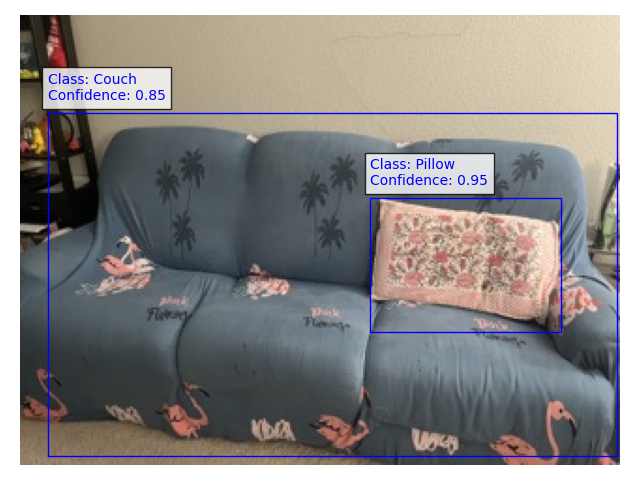

INFO:werkzeug:127.0.0.1 - - [14/Nov/2023 02:45:36] "POST /airbnb_detections2 HTTP/1.1" 200 -


{'changed_items': [{'category': 'Living Room', 'amenity_name': 'Couch', 'old_count': Decimal('2'), 'new_count': Decimal('1')}, {'category': 'Living Room', 'amenity_name': 'Pillow', 'old_count': Decimal('6'), 'new_count': Decimal('1')}], 'missing_items': [{'category': 'Living Room', 'amenity_name': 'bench', 'old_count': Decimal('2'), 'new_count': 0}, {'category': 'Living Room', 'amenity_name': 'vase', 'old_count': Decimal('4'), 'new_count': 0}, {'category': 'Living Room', 'amenity_name': 'tv', 'old_count': Decimal('2'), 'new_count': 0}, {'category': 'Living Room', 'amenity_name': 'book', 'old_count': Decimal('2'), 'new_count': 0}, {'category': 'Living Room', 'amenity_name': 'potted plant', 'old_count': Decimal('6'), 'new_count': 0}], 'unchanged_items': [{'category': 'Kitchen', 'amenity_name': 'dining table', 'count': Decimal('1')}, {'category': 'Kitchen', 'amenity_name': 'Bed', 'count': Decimal('1')}, {'category': 'Kitchen', 'amenity_name': 'chair', 'count': Decimal('2')}, {'category': 

INFO:werkzeug:127.0.0.1 - - [14/Nov/2023 02:46:34] "POST /get_inventory HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [14/Nov/2023 02:46:34] "GET /static/about_style.css HTTP/1.1" 304 -


Hi
Hi
[11/14 02:46:53 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl ...
[11/14 02:46:54 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet

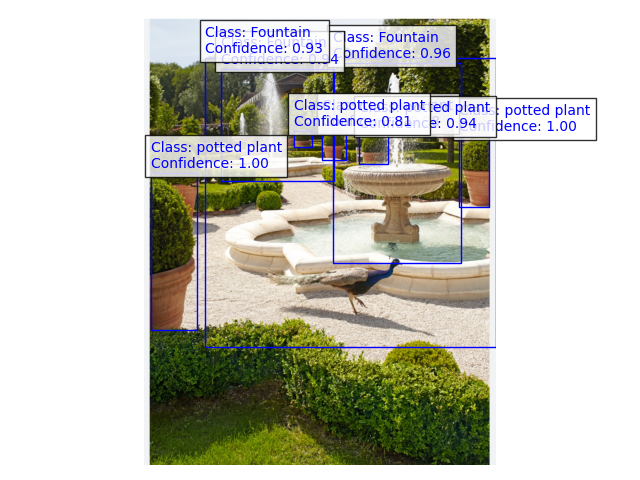

INFO:werkzeug:127.0.0.1 - - [14/Nov/2023 02:47:03] "POST /airbnb_detections2 HTTP/1.1" 200 -


{'changed_items': [{'category': 'Outdoor', 'amenity_name': 'potted plant', 'old_count': 0, 'new_count': Decimal('5')}, {'category': 'Outdoor', 'amenity_name': 'Fountain', 'old_count': 0, 'new_count': Decimal('3')}], 'missing_items': [], 'unchanged_items': [{'category': 'Living Room', 'amenity_name': 'Couch', 'count': Decimal('1')}, {'category': 'Kitchen', 'amenity_name': 'dining table', 'count': Decimal('1')}, {'category': 'Living Room', 'amenity_name': 'Pillow', 'count': Decimal('1')}, {'category': 'Kitchen', 'amenity_name': 'Bed', 'count': Decimal('1')}, {'category': 'Kitchen', 'amenity_name': 'chair', 'count': Decimal('2')}, {'category': 'Kitchen', 'amenity_name': 'cup', 'count': Decimal('7')}, {'category': 'Kitchen', 'amenity_name': 'bottle', 'count': Decimal('5')}, {'category': 'Kitchen', 'amenity_name': 'oven', 'count': Decimal('1')}, {'category': 'Kitchen', 'amenity_name': 'teddy bear', 'count': Decimal('1')}, {'category': 'Kitchen', 'amenity_name': 'microwave', 'count': Decimal

INFO:werkzeug:127.0.0.1 - - [14/Nov/2023 02:47:26] "POST /get_inventory HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [14/Nov/2023 02:47:27] "GET /static/about_style.css HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [14/Nov/2023 02:49:02] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [14/Nov/2023 02:49:02] "GET /static/chatbot_style.css HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [14/Nov/2023 02:49:02] "GET /static/app.js HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [14/Nov/2023 02:49:02] "GET /static/style.css HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [14/Nov/2023 02:49:03] "GET /static/images/airbnb_logo.jpeg HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [14/Nov/2023 02:49:03] "GET /static/images/chat_icon.png HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [14/Nov/2023 02:49:03] "GET /static/images/hero-background.jpeg HTTP/1.1" 200 -


Hi
Hi
[11/14 02:49:33 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl ...
[11/14 02:49:33 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet

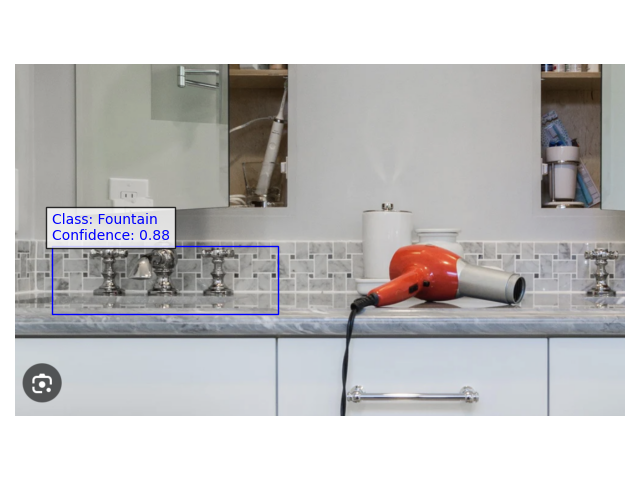

INFO:werkzeug:127.0.0.1 - - [14/Nov/2023 02:49:38] "POST /airbnb_detections2 HTTP/1.1" 200 -


{'changed_items': [], 'missing_items': [], 'unchanged_items': [{'category': 'Living Room', 'amenity_name': 'Couch', 'count': Decimal('1')}, {'category': 'Kitchen', 'amenity_name': 'dining table', 'count': Decimal('1')}, {'category': 'Living Room', 'amenity_name': 'Pillow', 'count': Decimal('1')}, {'category': 'Kitchen', 'amenity_name': 'Bed', 'count': Decimal('1')}, {'category': 'Kitchen', 'amenity_name': 'chair', 'count': Decimal('2')}, {'category': 'Kitchen', 'amenity_name': 'cup', 'count': Decimal('7')}, {'category': 'Outdoor', 'amenity_name': 'potted plant', 'count': Decimal('5')}, {'category': 'Kitchen', 'amenity_name': 'bottle', 'count': Decimal('5')}, {'category': 'Outdoor', 'amenity_name': 'Fountain', 'count': Decimal('3')}, {'category': 'Kitchen', 'amenity_name': 'oven', 'count': Decimal('1')}, {'category': 'Kitchen', 'amenity_name': 'teddy bear', 'count': Decimal('1')}, {'category': 'Kitchen', 'amenity_name': 'microwave', 'count': Decimal('1')}, {'category': 'Kitchen', 'ameni

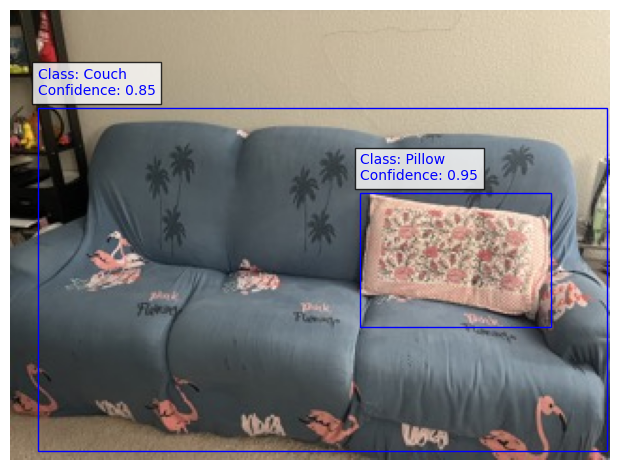

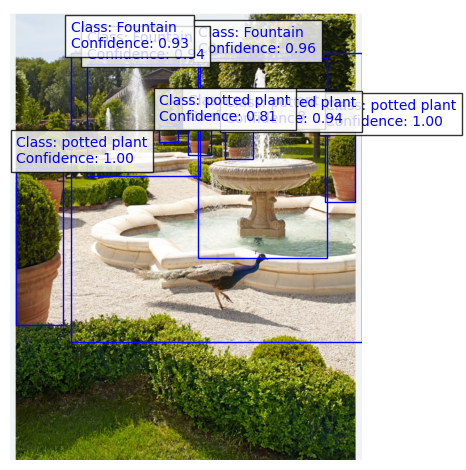

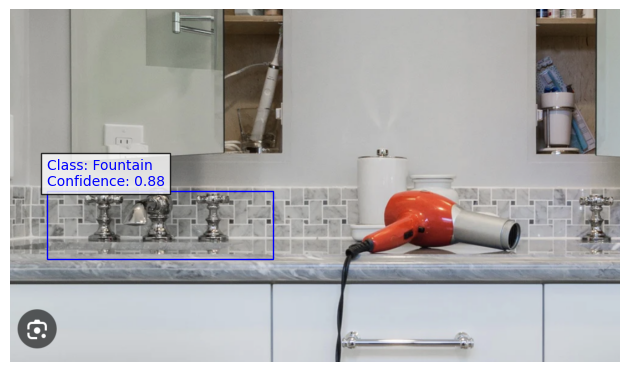

In [8]:
from flask import Flask, render_template, request, redirect, url_for,session, jsonify
from flask_ngrok import run_with_ngrok
import Utility
import EnsembleModel
from chat import answer_question
import base64
import io
import numpy as np
app = Flask(__name__)
app.secret_key = '1'
run_with_ngrok(app)

airbnb_openV7_metadata = Utility.register()
mask_cfg,mask_predictor = EnsembleModel.load_pretrained_maskRCNN_Model()
faster_predictor = EnsembleModel.fasterrcnn_model()
@app.route('/')
def index():
    return render_template('index.html')

@app.route('/about')
def about():
    return render_template('about.html')

@app.route('/register', methods=['GET', 'POST'])
def register():
    if request.method == 'POST':
        # Handle registration logic here (e.g., store user data in a database)
        return redirect(url_for('login'))
    return render_template('register.html')

@app.route('/login', methods=['GET', 'POST'])
def login():
    if request.method == 'POST':
        # Handle login logic here (e.g., check credentials)
        return 'Logged in successfully'  # Replace with your login logic
    return render_template('login.html')

@app.route('/host_view')
def host_view():
    return render_template('host_view.html')

@app.route('/guest_view')
def guest_view():
    return render_template('guest_view.html')

@app.route('/register_airbnb', methods=['GET', 'POST'])
def register_airbnb():
    if request.method == 'GET':
        print('Register Page - GET')
    if request.method == 'POST':
            print('Register Page - Post')
            airbnb_id = int(request.form['id'])
            print('airbnb_id',airbnb_id)
            session['airbnb_id'] = airbnb_id
            airbnb_name = request.form['name']
            airbnb_location = request.form['location']
            airbnb_price = float(request.form['price'])
            if Utility.insert_into_airbnb_registration(airbnb_id, airbnb_name, airbnb_location, airbnb_price):
              print('Inserted into airbnb_registration')
            return render_template('airbnb_detections.html')
            # print(uploaded_image)
            # image,detected_labels_str = RetinaNetClass.upload_image(uploaded_image,predictor,airbnb_openV7_metadata,airbnb_id)
            # Convert the PIL image to a byte stream
            # image_byte_array = io.BytesIO()
            # image.save(image_byte_array, format='JPEG')
            # Encode the byte stream as base64
            # base64_image = base64.b64encode(image_byte_array.getvalue()).decode('utf-8')
    # else:
        # If no image was uploaded, set base64_image to None
        # base64_image = None

    return render_template('register_airbnb.html')


@app.route('/airbnb_detections', methods=['GET', 'POST'])
def airbnb_detections():
    if request.method == 'POST':
        # Check if the 'amenity' field is filled out
        selected_amenity = request.form.get('amenity')
        airbnb_id = session.get('airbnb_id')

        if selected_amenity:
            # Check if images were uploaded
            if 'image' in request.files:
                uploaded_images = request.files.getlist('image')
                detected_images = []  # Store detected images and labels for each image

                for uploaded_image in uploaded_images:
                    if uploaded_image:
                        # Save the uploaded image temporarily
                        temp_image_path = 'temp_image.jpg'
                        uploaded_image.save(temp_image_path)

                        # Process each uploaded image here
                        image, detected_labels_str = EnsembleModel.process_uploaded_image(temp_image_path, airbnb_openV7_metadata, airbnb_id, selected_amenity)
                        display(image)
                        #Convert the PIL image to a byte stream
                        image_byte_array = io.BytesIO()

                        # Convert RGBA to RGB before saving as JPEG
                        if image.mode == 'RGBA':
                            image = image.convert('RGB')

                        image.save(image_byte_array, format='JPEG')
                        base64_image = base64.b64encode(image_byte_array.getvalue()).decode('utf-8')
                        detected_images.append((base64_image, detected_labels_str))

                return render_template('airbnb_detections.html', detected_images=detected_images)

    return render_template('airbnb_detections.html')


@app.post("/airbot")
def predict():
    conv_history = request.get_json().get("conv_history")
    response = answer_question(conv_history, user_info='')
    message = {"answer": response}
    return jsonify(message)



@app.route('/get_inventory', methods=['GET', 'POST'])
def get_inventory():
    if request.method == 'POST':
        # Check if the form is for generating the current inventory or submitting updates
            # Form for generating current inventory
            airbnb_id = request.form.get('airbnbId')

            # Fetch inventory data based on the airbnb_id
            inventory_data = Utility.get_inventory_data(airbnb_id)

            # Render the dynamic table using a Jinja2 template
            return render_template('dynamic_table.html', inventory_data=inventory_data)

    else:
        # Handle GET requests (if needed)
        return render_template('get_inventory.html')
@app.route('/airbnb_detections2', methods=['GET', 'POST'])
def airbnb_detections2():
    if request.method == 'POST':
        # Check if the 'amenity' field is filled out
        selected_amenity = request.form.get('category')
        airbnb_id = request.form.get('airbnbId')
        # Fetch inventory data based on the airbnb_id
        inventory_data_old = Utility.get_inventory_data(airbnb_id)
        Utility.delete_rows(airbnb_id, selected_amenity)
        print('Hi')
        if selected_amenity:
            # Check if images were uploaded
            if 'images' in request.files:
                uploaded_images = request.files.getlist('images')
                detected_images = []  # Store detected images and labels for each image
                print('Hi')
                for uploaded_image in uploaded_images:
                    if uploaded_image:
                        # Save the uploaded image temporarily
                        temp_image_path = 'temp_image.jpg'
                        uploaded_image.save(temp_image_path)

                        # Process each uploaded image here
                        image, detected_labels_str = EnsembleModel.process_uploaded_image(temp_image_path, airbnb_openV7_metadata, airbnb_id, selected_amenity)
                        display(image)
                        #Convert the PIL image to a byte stream
                        image_byte_array = io.BytesIO()

                        # Convert RGBA to RGB before saving as JPEG
                        if image.mode == 'RGBA':
                            image = image.convert('RGB')

                        image.save(image_byte_array, format='JPEG')
                        base64_image = base64.b64encode(image_byte_array.getvalue()).decode('utf-8')
                        detected_images.append((base64_image, detected_labels_str))

                inventory_data_new = Utility.get_inventory_data(airbnb_id)

                                # Compare inventory data
                result_dict = compare_inventory_data(inventory_data_old, inventory_data_new)
                print(result_dict)
                # Prepare the update report
                changed_items = result_dict['changed_items']
                missing_items = result_dict['missing_items']
                unchanged_items = result_dict['unchanged_items']

                # Return the detected images and update report
                return jsonify({
                    'detected_images': detected_images,
                    'update_report': {
                        'changed_items': changed_items,
                        'missing_items': missing_items,
                        'unchanged_items': unchanged_items
                    }
                })


    return render_template('get_inventory.html')
if __name__ == '__main__':
    app.run()



In [ ]:
# import json
# import matplotlib.pyplot as plt

# # Lists to store loss values and iterations
# iterations = []
# loss_box_reg_values = []
# loss_cls_values = []

# # Assuming the data is in a text file named "data.txt"
# with open("metrics (1).json", "r") as file:
#     for line in file:
#         # Parse each line as JSON
#         data = json.loads(line)

#         # Extract relevant data
#         iteration = data["iteration"]
#         loss_box_reg = data["loss_box_reg"]
#         loss_cls = data["loss_cls"]

#         # Append data to lists
#         iterations.append(iteration)
#         loss_box_reg_values.append(loss_box_reg)
#         loss_cls_values.append(loss_cls)

# # Close the file when done
# file.close()

# # Create a loss graph
# plt.figure(figsize=(5, 5))
# # plt.plot(iterations, loss_box_reg_values, label="Loss Box Reg")
# plt.plot(iterations, loss_cls_values, label="Loss CLS")
# plt.xlabel("Iteration")
# plt.ylabel("Loss")
# plt.title("Loss Graph")
# plt.legend()
# plt.grid(True)

# # Show the graph
# plt.show()
